In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

In [3]:
!wget $data

--2025-10-09 02:01:15--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv.1’

car_fuel_efficiency 100%[===================>] 853.70K  3.66MB/s    in 0.2s    

2025-10-09 02:01:16 (3.66 MB/s) - ‘car_fuel_efficiency.csv.1’ saved [874188/874188]



In [4]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [5]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [6]:
df.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

In [7]:
df.fuel_efficiency_mpg

0       13.231729
1       13.688217
2       14.246341
3       16.912736
4       12.488369
          ...    
9699    15.101802
9700    17.962326
9701    17.186587
9702    15.331551
9703    14.884467
Name: fuel_efficiency_mpg, Length: 9704, dtype: float64

# EDA

In [8]:
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
fuel_eff = np.log1p(df.fuel_efficiency_mpg)

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

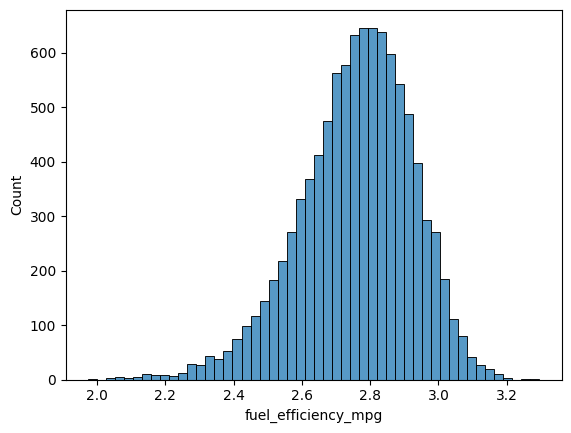

In [10]:
sns.histplot(fuel_eff, bins=50)

# 1

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   num_cylinders        9222 non-null   float64
 2   horsepower           8996 non-null   float64
 3   vehicle_weight       9704 non-null   float64
 4   acceleration         8774 non-null   float64
 5   model_year           9704 non-null   int64  
 6   origin               9704 non-null   object 
 7   fuel_type            9704 non-null   object 
 8   drivetrain           9704 non-null   object 
 9   num_doors            9202 non-null   float64
 10  fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 834.1+ KB


# 2

In [12]:
df.describe()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,num_doors,fuel_efficiency_mpg
count,9704.000000,9222.000000,8996.000000,9704.000000,8774.000000,9704.000000,9202.000000,9704.000000
mean,199.708368,3.962481,149.657292,3001.280993,15.021928,2011.484027,-0.006412,14.985243
std,49.455319,1.999323,29.879555,497.894860,2.510339,6.659808,1.048162,2.556468
min,10.000000,0.000000,37.000000,952.681761,6.000000,2000.000000,-4.000000,6.200971
25%,170.000000,3.000000,130.000000,2666.248985,13.300000,2006.000000,-1.000000,13.267459
50%,200.000000,4.000000,149.000000,2993.226296,15.000000,2012.000000,0.000000,15.006037
75%,230.000000,5.000000,170.000000,3334.957039,16.700000,2017.000000,1.000000,16.707965
max,380.000000,13.000000,271.000000,4739.077089,24.300000,2023.000000,4.000000,25.967222


In [13]:
df['horsepower'].median()

np.float64(149.0)

In [14]:
n = len(df)

n_val  = int(n * 0.2)
n_test  = int(n * 0.2)
n_train = n - n_val - n_test

n, n_val + n_test + n_train 

(9704, 9704)

In [15]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_val + n_train]
df_test = df.iloc[n_val + n_train:]

In [16]:
df_train

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
5819,160,4.0,156.0,2990.334203,14.6,2020,Asia,Diesel,Front-wheel drive,NaN,15.294958
5820,240,7.0,105.0,3495.100812,13.8,2014,Asia,Gasoline,All-wheel drive,1.0,12.426054
5821,210,4.0,171.0,3434.252180,15.3,2011,USA,Diesel,Front-wheel drive,1.0,12.509291
5822,180,3.0,172.0,2967.708852,NaN,2018,USA,Gasoline,All-wheel drive,0.0,14.746571


In [17]:
idx = np.arange(n)

In [18]:
np.random.seed(42)
np.random.shuffle(idx)

In [19]:
idx

array([ 483, 7506, 8795, ..., 5390,  860, 7270], shape=(9704,))

In [62]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_val + n_train]]
df_test = df.iloc[idx[n_val + n_train:]]

In [63]:
len(df_train), len(df_val), len(df_test)

(5822, 1940, 1942)

In [22]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   num_cylinders        9222 non-null   float64
 2   horsepower           8996 non-null   float64
 3   vehicle_weight       9704 non-null   float64
 4   acceleration         8774 non-null   float64
 5   model_year           9704 non-null   int64  
 6   origin               9704 non-null   object 
 7   fuel_type            9704 non-null   object 
 8   drivetrain           9704 non-null   object 
 9   num_doors            9202 non-null   float64
 10  fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 834.1+ KB


In [24]:
y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

In [44]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [45]:
df_train

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors
9066,240,2.0,136.0,4050.512290,11.5,2006,Europe,Diesel,All-wheel drive,-1.0
3073,190,2.0,141.0,3195.866942,17.2,2017,Europe,Diesel,All-wheel drive,-1.0
2476,200,3.0,184.0,3006.164370,9.9,2017,USA,Diesel,Front-wheel drive,0.0
658,200,4.0,NaN,2947.143980,18.1,2022,Europe,Diesel,All-wheel drive,-1.0
954,250,NaN,132.0,3114.371978,11.7,2001,Asia,Gasoline,All-wheel drive,1.0
...,...,...,...,...,...,...,...,...,...,...
9457,160,4.0,193.0,2419.736198,15.9,2022,USA,Gasoline,All-wheel drive,1.0
312,210,5.0,NaN,3012.170524,15.1,2001,Asia,Gasoline,All-wheel drive,0.0
351,260,5.0,161.0,3022.148840,14.9,2021,USA,Gasoline,All-wheel drive,-1.0
9170,140,4.0,NaN,3927.946098,13.0,2016,Asia,Diesel,Front-wheel drive,1.0


# 3

In [46]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [47]:
features = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

df_train_0 = df_train.copy()

df_train_0['horsepower'] = df_train_0['horsepower'].fillna(0)

X_train_with_0 = df_train_0[features].values

w0, w = train_linear_regression(X_train_with_0, y_train)

y_pred = w0 + X_train_with_0.dot(w)

<Axes: ylabel='Count'>

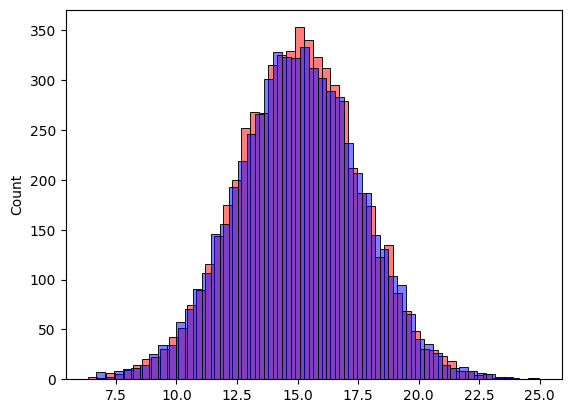

In [48]:
sns.histplot(y_pred, color='red', bins=50, alpha=0.5)
sns.histplot(y_train, color='blue', bins=50, alpha=0.5)

In [49]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [50]:
rmse(y_train, y_pred)

np.float64(0.522028332703877)

In [51]:
df_train_mean = df_train.copy()

df_train_mean['horsepower'] = df_train_mean['horsepower'].fillna(df_train_mean['horsepower'].mean())

X_train_with_mean = df_train_mean[features].values

w0, w = train_linear_regression(X_train_with_mean, y_train)

y_pred = w0 + X_train_with_0.dot(w)

<Axes: ylabel='Count'>

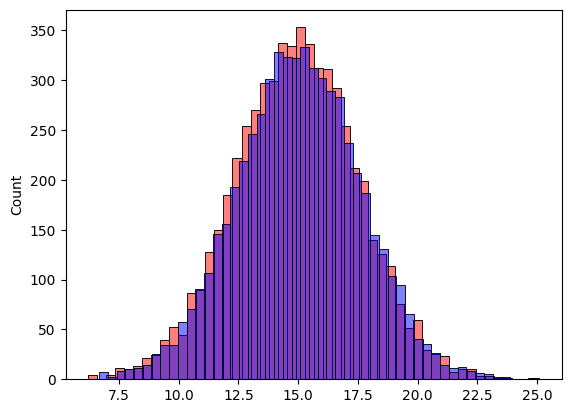

In [52]:
sns.histplot(y_pred, color='red', bins=50, alpha=0.5)
sns.histplot(y_train, color='blue', bins=50, alpha=0.5)

In [53]:
rmse(y_train, y_pred)

np.float64(0.6212321428976572)

In [54]:
def prepare_X(df):
    df_num = df[features]
    X = df_num.fillna(0).values
    return X

In [55]:
# X_train_with_0 = prepare_X(df_train)

df_val_0 = df_val.copy()

df_val_0['horsepower'] = df_val_0['horsepower'].fillna(0)

X_val_with_0 = df_val_0[features].values

w0, w = train_linear_regression(X_train_with_0, y_train)

# X_val_with_0 = prepare_X(df_val)
y_pred = w0 + X_val_with_0.dot(w)

rmse(y_val, y_pred)

np.float64(0.5131330922635593)

In [56]:
# X_val_with_mean = prepare_X(df_val)

df_val_mean = df_val.copy()

df_val_mean['horsepower'] = df_val_mean['horsepower'].fillna(df_train_mean['horsepower'].mean())

X_val_with_mean = df_val_mean[features].values

w0, w = train_linear_regression(X_train_with_mean, y_train)

y_pred = w0 + X_val_with_mean.dot(w)

rmse(y_val, y_pred)

np.float64(0.45525497126237385)

# 4

In [57]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [58]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]:
    
        X_train = prepare_X(df_train)
        w0, w = train_linear_regression_reg(X_train, y_train, r=r)
        
        X_val = prepare_X(df_val)
        y_pred = w0 + X_val.dot(w)
        score = rmse(y_val, y_pred)
        
        print(r, w0, score)

0.0 27.505863975451373 0.5131330922635593
1e-05 27.501523086279708 0.5131330001969855
0.0001 27.46251664843576 0.5131321909427506
0.001 27.07845283393107 0.5131259645813853
0.01 23.756150795991612 0.5132040981165982
0.1 10.667732007413868 0.5158074440199355
1 1.6388035757374317 0.5197135890869836
10 0.1731723715750714 0.5205074605785878


In [59]:
df_val.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors
7888,140,5.0,166.0,2683.147833,12.7,2008,USA,Diesel,All-wheel drive,0.0
1136,200,4.0,164.0,2379.938488,17.0,2004,Europe,Gasoline,All-wheel drive,1.0
4543,180,2.0,175.0,2775.381743,14.0,2014,Europe,Gasoline,Front-wheel drive,-1.0
6826,160,4.0,166.0,3542.655183,NaN,2012,Europe,Gasoline,All-wheel drive,0.0
5416,250,6.0,173.0,1354.787120,17.3,2007,Asia,Gasoline,Front-wheel drive,0.0


# 5

In [60]:
# Calculate split sizes
n = len(df)
n_train = int(0.6 * n)
n_val = int(0.2 * n)

# Store RMSE scores for all seeds
rmse_scores = []

# Loop through seeds 0-9
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    # Shuffle with current seed
    idx = np.arange(len(df))
    np.random.seed(seed)
    np.random.shuffle(idx)
    
    # Split the data
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_val + n_train]]
    df_test = df.iloc[idx[n_val + n_train:]]
    
    # Prepare X and y for train and validation (INSIDE THE LOOP!)
    X_train = prepare_X(df_train)
    y_train = df_train['fuel_efficiency_mpg'].values  # ← Extract y_train from NEW split
    
    X_val = prepare_X(df_val)
    y_val = df_val['fuel_efficiency_mpg'].values  # ← Extract y_val from NEW split
    
    # Train with NO regularization (r=0)
    w0, w = train_linear_regression_reg(X_train, y_train, r=0.0)
    
    # Predict on validation set
    y_pred = w0 + X_val.dot(w)
    
    # Calculate RMSE
    score = rmse(y_val, y_pred)
    rmse_scores.append(score)
    
    print(f'Seed {seed}: RMSE = {round(score, 2)}')

# Calculate standard deviation of all RMSE scores
std_value = np.std(rmse_scores)
print(f'\nStandard deviation: {round(std_value, 3)}')


Seed 0: RMSE = 0.52
Seed 1: RMSE = 0.52
Seed 2: RMSE = 0.52
Seed 3: RMSE = 0.52
Seed 4: RMSE = 0.51
Seed 5: RMSE = 0.53
Seed 6: RMSE = 0.53
Seed 7: RMSE = 0.51
Seed 8: RMSE = 0.51
Seed 9: RMSE = 0.51

Standard deviation: 0.007


# 6

In [64]:
# Calculate split sizes
n = len(df)
n_train = int(0.6 * n)
n_val = int(0.2 * n)

# Use seed 9
seed = 9
idx = np.arange(len(df))
np.random.seed(seed)
np.random.shuffle(idx)

# Split the data
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_val + n_train]]
df_test = df.iloc[idx[n_val + n_train:]]

# Combine train and validation
df_full_train = pd.concat([df_train, df_val]).reset_index(drop=True)

print(f'Train size: {len(df_train)}')
print(f'Val size: {len(df_val)}')
print(f'Combined train+val size: {len(df_full_train)}')
print(f'Test size: {len(df_test)}')

# Prepare X and y for FULL TRAIN (train + val combined)
X_full_train = prepare_X(df_full_train)
y_full_train = df_full_train['fuel_efficiency_mpg'].values  # ← Extract from df_full_train

# Prepare X and y for TEST
X_test = prepare_X(df_test)
y_test = df_test['fuel_efficiency_mpg'].values  # ← Extract from df_test (NEW split!)

print(f'\nX_full_train shape: {X_full_train.shape}')
print(f'y_full_train shape: {y_full_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

# Train with r=0.001
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

# Predict on test set
y_pred = w0 + X_test.dot(w)

print(f'y_pred shape: {y_pred.shape}')

# Calculate RMSE on test set
test_rmse = rmse(y_test, y_pred)

print(f'\nRMSE on test dataset: {round(test_rmse, 2)}')


Train size: 5822
Val size: 1940
Combined train+val size: 7762
Test size: 1942

X_full_train shape: (7762, 4)
y_full_train shape: (7762,)
X_test shape: (1942, 4)
y_test shape: (1942,)
y_pred shape: (1942,)

RMSE on test dataset: 0.52
